# Tomato Leaf disease classification

### Project Prerequisites

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Loading the training data

In [21]:
train_data = tf.keras.preprocessing.image_dataset_from_directory("Dataset/train",image_size=(512,512))
data_array = train_data.as_numpy_iterator()
batch = data_array.next()

Found 10000 files belonging to 10 classes.


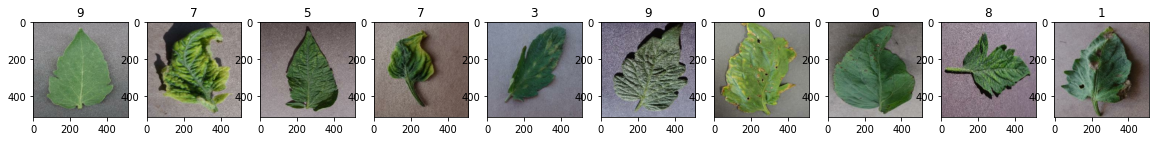

In [22]:
fig,ax = plt.subplots(ncols=10,figsize = (20,20))
for idx,img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocessing

In [23]:
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     fill_mode="nearest"
# )

# preprocessed_train_data = train_data.map(lambda x,y:(datagen.flow(x,y,batch_size=32),y))
# data_array = preprocessed_train_data.as_numpy_iterator()
# batch = data_array.next()

In [24]:
processed_train_data = train_data.map(lambda x,y: (x/255.0,y))
processed_train_data

<MapDataset shapes: ((None, 512, 512, 3), (None,)), types: (tf.float32, tf.int32)>

### Building the Neural Network 

In [34]:
model = tf.keras.models.Sequential()

##### first convolution layer

In [37]:
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size = 3,input_shape = [256,256,3],activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

##### second convolution layer

In [38]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))